In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
path = '/disk1/hrb/python/'

In [2]:
df = pd.read_csv(path+'data/catalogues/qsos/dr14q/dr14q_uid_mi_coords.csv', index_col='uid')

In [3]:
df = df[df['mi']!=9999]
df

,ra,dec,z,mi
uid,,,,
1,0.001898,17.773739,2.309000,-24.410782
2,0.002375,5.941903,2.103120,-24.732000
3,0.002756,14.974675,2.497000,-25.664871
4,0.004052,4.829781,1.619000,-25.806284
5,0.005026,24.065163,1.616210,-24.794746
...,...,...,...,...
526352,359.999118,28.954734,2.452000,-25.083122
526353,359.999303,34.720842,3.109000,-27.310951
526354,359.999615,3.268586,1.233161,-25.967665


## M_i vs z

In [4]:
def sns_correlate(df, vmin, vmax, save=False):
    from matplotlib.colors import LogNorm
    xname = 'z'
    yname = 'mi'
    
    data = df[[xname,yname]]
    
#     xbounds, ybounds = dr.properties[[xname,yname]].quantile(q=[0.001,0.999]).values.T
    xbounds, ybounds = (0,5), (-30,-20)
    
    data = data[((xbounds[0] < data[xname])&(data[xname] < xbounds[1])) & ((ybounds[0] < data[yname])&(data[yname] < ybounds[1]))]
    
    bounds={xname:xbounds, yname:ybounds}
    g = sns.JointGrid(x=xname, y=yname, data=data, xlim=bounds[xname], ylim=bounds[yname], height=6)
    g = g.plot_joint(plt.hexbin, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Blues')
    g.ax_marg_x.hist(data[xname], bins=200, color='royalblue')
    g.ax_marg_y.hist(data[yname], bins=200, orientation='horizontal', density = True, color='royalblue')
    g.ax_joint.invert_yaxis()
    
    g.ax_joint.set(xlabel='Redshift', ylabel=r'M$_\mathrm{i}[\mathrm{z}=2]$')
#     g.ax_marg_y.hist(data[yname], bins=200, orientation='horizontal', cumulative=True, alpha=0.2, color='k')#, yticks=[1e-3, 1e-1, 1])
    # Could show 95, 99, 99.9% intervals on magerr histplot? Will need to do np.stats.quantile and ax.axvline
#     q = [0.85,0.95,0.99]
#     quantiles = zip(np.quantile(data[yname],q),q)
#     for q_val,q in quantiles:
#         g.ax_marg_y.axhline(y=q_val, lw=2, ls='--', color='k')
#         g.ax_marg_y.text(y=q_val+0.003,x=0.8, s=f'{q*100:.0f}%: {q_val:.2f}', fontdict={'size':12}, horizontalalignment='center')
#     g.ax_marg_y.set(xscale='log')

#     plt.suptitle(self.obj + ' ' + band, x=0.1, y=0.95)
    if save:
        g.savefig(path+'analysis/plots/Mi_z.pdf')

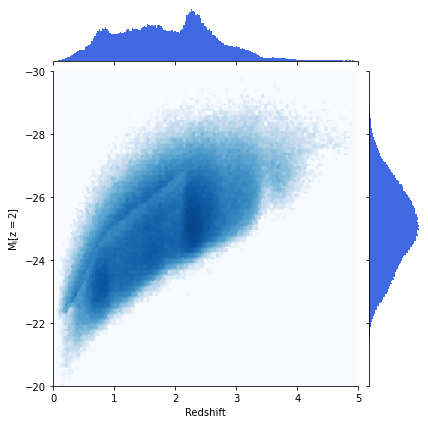

In [6]:
sns_correlate(df, 3e0, 1e3, True)

---

## Redshift

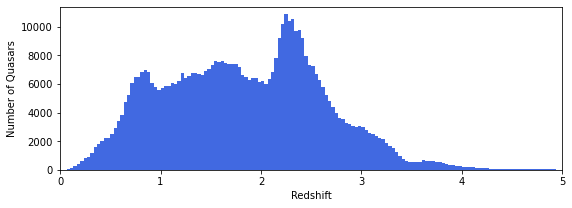

In [186]:
fig, ax = plt.subplots(1,1, figsize=(9,3))
ax.hist(df['z'], bins=150, range=(0,5), color='royalblue');
ax.set(ylabel='Number of Quasars', xlabel='Redshift', xlim=[0,5])
fig.savefig(path+'analysis/plots/redshift.pdf', bbox_inches='tight')

---

## mag dist

In [178]:
import pandas as pd 
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
%matplotlib inline
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic
from funcs.analysis.analysis import *

In [179]:
# obj = 'calibStars'
# ID  = 'uid_s'
obj = 'qsos'
ID = 'uid'
band = 'r'

In [180]:
def reader(n_subarray):
    return pd.read_csv(wdir+'data/merged/{}/{}_band/lc_{}.csv'.format(obj,band,n_subarray), comment='#', nrows=None, index_col = ID, dtype = {'catalogue': np.uint8, 'mag_ps': np.float32, 'magerr': np.float32, 'mjd': np.float64, ID: np.uint32})


In [181]:
# band = 'r'
dr = analysis(ID, obj)

In [183]:
# dr.read_in(reader, redshift=True)
dr.band = 'r'
dr.group(keys = ['uid'],read_in=True)

In [184]:
dr.df_grouped

,n_tot,n_sss_r1,n_sss_r2,n_sdss,n_ps,n_ztf,mjd_min,mjd_max,mjd_ptp,mag_min,...,mag_med,mag_opt_mean,mag_opt_mean_flux,mag_std,magerr_max,magerr_mean,magerr_med,magerr_opt_std,redshift,mjd_ptp_rf
uid,,,,,,,,,,,,,,,,,,,,,
1,20,0,0,1,2,17,54741.371761,58475.144699,3733.772938,20.648458,...,21.280437,21.391485,21.569781,0.303328,0.206130,0.169525,0.174606,0.036470,2.309000,1128.368975
2,15,0,0,1,6,8,54747.352476,58487.101042,3739.748566,20.885572,...,21.338759,21.153275,21.196141,0.211375,0.218896,0.137845,0.168371,0.023076,2.103120,1205.157456
3,28,0,0,1,4,23,52170.284887,58487.100579,6316.815692,20.204323,...,20.783174,20.839113,20.865847,0.171582,0.190376,0.143654,0.165816,0.018146,2.497000,1806.352786
4,42,0,0,1,8,33,54764.193704,58655.441829,3891.248124,19.624706,...,19.854283,19.730980,19.741959,0.109456,0.108703,0.081237,0.095557,0.007432,1.619000,1485.776298
5,41,0,0,1,8,32,53271.313403,58657.436319,5386.122916,20.416544,...,20.872179,20.861860,20.891596,0.184846,0.184414,0.137326,0.154009,0.015900,1.616210,2058.749985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526352,26,0,0,2,6,18,52909.369624,58486.100787,5576.731163,20.730858,...,21.303963,21.367025,21.438924,0.247556,0.211098,0.165825,0.181719,0.024806,2.452000,1615.507289
526353,62,0,0,3,5,54,52909.353868,58657.434954,5748.081086,19.774813,...,19.990250,20.012676,20.045792,0.115852,0.110659,0.083103,0.091315,0.007625,3.109000,1398.900240
526354,48,0,0,1,10,37,54741.213069,58655.441829,3914.228759,18.583073,...,19.022628,18.965803,19.005658,0.136132,0.068640,0.049646,0.058919,0.003991,1.233161,1752.774916


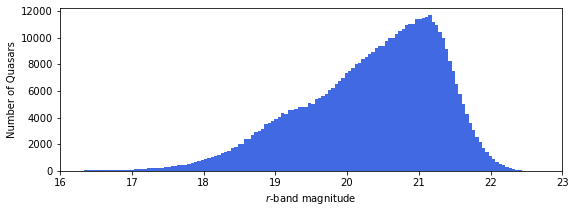

In [188]:
fig, ax = plt.subplots(1,1, figsize=(9,3))
ax.hist(dr.df_grouped['mag_mean'], bins=150, range=(16,23), color='royalblue');
ax.set(ylabel='Number of Quasars', xlabel=r'$r$-band magnitude', xlim=[16,23])
fig.savefig(path+'analysis/plots/qso_mag_dist.pdf', bbox_inches='tight')